In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
dataset = pd.read_csv("kc_house_data.csv")
dataset.head(1)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.0,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650


In [3]:
y_ = dataset.price
type(y_)

pandas.core.series.Series

In [4]:
y_

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21592    360000.0
21593    400000.0
21594    402101.0
21595    400000.0
21596    325000.0
Name: price, Length: 21597, dtype: float64

In [5]:
columns = dataset.columns

In [6]:
columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [7]:
dataset.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null int64
view             21597 non-null int64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null int64
yr_built         21597 non-null int64
yr_renovated     21597 non-null int64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


# work with every feature

In [9]:
#drop prices, it is the target value
dataset.drop(["price"], axis=1, inplace=True)

In [10]:
#drop id,doesn't participate in predicting prices
dataset.drop(["id"], axis=1, inplace=True)
dataset.columns

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [11]:
#date and yr_built
from datetime import datetime
print(dataset['yr_built'].head(), type(dataset['yr_built']))

0    1955
1    1951
2    1933
3    1965
4    1987
Name: yr_built, dtype: int64 <class 'pandas.core.series.Series'>


In [12]:
#finding age of the house in years
cur_year = datetime.now().year
year_built = dataset["yr_built"]
age_of_house = [(cur_year - year_built[ix]) for ix in range(len(dataset["yr_built"]))]
print(age_of_house[:5])

[65, 69, 87, 55, 33]


# drop date and add house age in days

In [13]:
#drop date and yr_built
dataset.drop(["date", "yr_built"], axis=1, inplace=True)

In [14]:
#add age_of_house
dataset["house_age_in_years"] = pd.Series(age_of_house)
dataset.head(5)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,house_age_in_years
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,0,98178,47.5112,-122.257,1340,5650,65
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1991,98125,47.7210,-122.319,1690,7639,69
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,0,98028,47.7379,-122.233,2720,8062,87
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,0,98136,47.5208,-122.393,1360,5000,55
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,0,98074,47.6168,-122.045,1800,7503,33


In [15]:
#no need to change bedrooms or bathrooms
#add total area, which is the sum of two
dataset['sqft_total_area'] = dataset["sqft_living"] + dataset["sqft_lot"]
dataset["sqft_total_area"].head()

0     6830
1     9812
2    10770
3     6960
4     9760
Name: sqft_total_area, dtype: int64

In [16]:
#dropping view
dataset.drop(["view"], axis=1, inplace=True)
dataset.head(5)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,house_age_in_years,sqft_total_area
0,3,1.00,1180,5650,1.0,0,3,7,1180,0,0,98178,47.5112,-122.257,1340,5650,65,6830
1,3,2.25,2570,7242,2.0,0,3,7,2170,400,1991,98125,47.7210,-122.319,1690,7639,69,9812
2,2,1.00,770,10000,1.0,0,3,6,770,0,0,98028,47.7379,-122.233,2720,8062,87,10770
3,4,3.00,1960,5000,1.0,0,5,7,1050,910,0,98136,47.5208,-122.393,1360,5000,55,6960
4,3,2.00,1680,8080,1.0,0,3,8,1680,0,0,98074,47.6168,-122.045,1800,7503,33,9760


In [17]:
yr_renovated, age_in_years = dataset['yr_renovated'], dataset['house_age_in_years']
for ix in range(len(yr_renovated)):
    #if not renovated, set it to yr_built
    if yr_renovated[ix]==0:
        yr_renovated[ix] = age_in_years[ix]
dataset['age_in_year_since_renovation'] = yr_renovated

/home/mayank/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [18]:
dataset.drop(['yr_renovated'], axis=1, inplace=True)
dataset.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,house_age_in_years,sqft_total_area,age_in_year_since_renovation
0,3,1.00,1180,5650,1.0,0,3,7,1180,0,98178,47.5112,-122.257,1340,5650,65,6830,65
1,3,2.25,2570,7242,2.0,0,3,7,2170,400,98125,47.7210,-122.319,1690,7639,69,9812,1991
2,2,1.00,770,10000,1.0,0,3,6,770,0,98028,47.7379,-122.233,2720,8062,87,10770,87
3,4,3.00,1960,5000,1.0,0,5,7,1050,910,98136,47.5208,-122.393,1360,5000,55,6960,55
4,3,2.00,1680,8080,1.0,0,3,8,1680,0,98074,47.6168,-122.045,1800,7503,33,9760,33


In [19]:
#drop lat and long, zipcode
dataset.drop(["lat", "long", "zipcode"], axis=1, inplace=True)
dataset.head(5)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,house_age_in_years,sqft_total_area,age_in_year_since_renovation
0,3,1.00,1180,5650,1.0,0,3,7,1180,0,1340,5650,65,6830,65
1,3,2.25,2570,7242,2.0,0,3,7,2170,400,1690,7639,69,9812,1991
2,2,1.00,770,10000,1.0,0,3,6,770,0,2720,8062,87,10770,87
3,4,3.00,1960,5000,1.0,0,5,7,1050,910,1360,5000,55,6960,55
4,3,2.00,1680,8080,1.0,0,3,8,1680,0,1800,7503,33,9760,33


# create model

In [20]:
#model from scratch
class LinearModel:
    def __init__(self):
        self.weights = None
        self.metrics = None
        self.cost_history = None
        self.X_train_mean = None
        self.X_train_std = None
    
    def normalize_data(self, X):
        X = X-self.X_train_mean
        X = X/self.X_train.std
        return X
    
    def fit(self, X, y, alpha=0.001, epochs=20):
        self.X_train_mean = np.mean(X, axis=0)
        self.X_train_std = np.std(X, axis=0)
        X = (X-self.X_train_mean)/self.X_train_std
        X_train = np.ones((X.shape[0], 1+X.shape[1]))
        X_train[:, 1:] = X
        self.weights = np.zeros(1+X.shape[1], )
        self.cost_history = []
        
        for epoch in range(epochs):
            cost = 0
            for ix in range(X_train.shape[0]):
                y_pred = np.dot(X_train[ix], self.weights.T)
                #if ix<10:
                #    print(y_pred, y[ix])
                for iy in range(X_train.shape[1]):
                    self.weights[iy] = self.weights[iy] - (alpha/X.shape[0])*(y_pred-y[ix])*X_train[ix, iy]
                cost += (y_pred-y[ix])**2
            cost = cost/X.shape[0]
            print("Cost at epoch {} is {}".format(epoch, cost))
            self.cost_history.append(cost)
    
    def predict(self, X_):
        X = np.ones((X_.shape[0], X_.shape[1]+1))
        X_ = (X_-self.X_train_mean)/self.X_train_std 
        X[:, 1:] = X_
        y_pred = np.ones(X.shape[0])
        print(y_pred.shape)
        for ix in range(X.shape[0]):
            y_pred[ix] = np.dot(X[ix], self.weights.T)
        return y_pred

    def get_cost_history(self):
        return self.cost_history

In [21]:
X, y = dataset.values, y_.values
print(X.shape, y.shape)

(21597, 15) (21597,)


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(16197, 15) (5400, 15) (16197,) (5400,)


In [23]:
linear_regression_model = LinearModel()
linear_regression_model.fit(X_train, y_train, alpha=0.5, epochs=100)

Cost at epoch 0 is 263165855729.22177
Cost at epoch 1 is 123318750021.95424
Cost at epoch 2 is 75968384664.52705
Cost at epoch 3 is 58245792757.89356
Cost at epoch 4 is 51419930962.786644
Cost at epoch 5 is 48687779598.47484
Cost at epoch 6 is 47529142844.08012
Cost at epoch 7 is 46995930702.60436
Cost at epoch 8 is 46724332520.48535
Cost at epoch 9 is 46570507131.75594
Cost at epoch 10 is 46474913745.11175
Cost at epoch 11 is 46411211022.501945
Cost at epoch 12 is 46366691287.922844
Cost at epoch 13 is 46334597129.65159
Cost at epoch 14 is 46310984921.97575
Cost at epoch 15 is 46293370261.6246
Cost at epoch 16 is 46280097580.86006
Cost at epoch 17 is 46270019991.57443
Cost at epoch 18 is 46262321680.66917
Cost at epoch 19 is 46256411468.71127
Cost at epoch 20 is 46251855057.66844
Cost at epoch 21 is 46248329982.48212
Cost at epoch 22 is 46245594722.50714
Cost at epoch 23 is 46243467050.05393
Cost at epoch 24 is 46241808601.32051
Cost at epoch 25 is 46240513737.12837
Cost at epoch 26 i

In [24]:
y_pred = linear_regression_model.predict(X_test[:10, :])

(10,)


In [25]:
print(y_pred)
print(y_test[:10])

[ 123831.21600763  312140.85113987  305731.29300549  245491.23713546
  391286.25785191  438931.47950594  127779.50817982 1114954.18668162
  494906.93606991  346055.13021015]
[132500. 415000. 494000. 355000. 606000. 640000. 256500. 959000. 445000.
 254000.]


In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test[:10])
print(y_pred)
print(y_test[:10])

[ 118295.3561971   310053.38282296  305631.35292142  241394.40192954
  388884.40031359  437175.594886    122772.18246493 1127375.96625858
  492654.47991137  344449.31375586]
[132500. 415000. 494000. 355000. 606000. 640000. 256500. 959000. 445000.
 254000.]


In [28]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [33]:
X_train_nn = np.ones((X_train.shape[0], X_train.shape[1]+1))
X_test_nn = np.ones((X_test.shape[0], X_test.shape[1]+1))
X_train_nn[:, 1:] = (X_train-np.mean(X_train, axis=0))/np.std(X_train, axis=0)
X_test_nn[:, 1:] = (X_test-np.mean(X_train, axis=0))/np.std(X_train, axis=0)
nn_model = Sequential()
nn_model.add(Dense(1, input_shape=(16, )))
nn_model.compile(optimizer='sgd', loss=tf.keras.losses.MeanSquaredError())
nn_model.fit(X_train_nn, y_train, batch_size=32, epochs=100)

Train on 16197 samples
Epoch 1/100
16197/16197 [==============================] - 1s 39us/sample - loss: 57295811435.0974
Epoch 2/100
16197/16197 [==============================] - 0s 27us/sample - loss: 46960590045.0227
Epoch 3/100
16197/16197 [==============================] - 0s 28us/sample - loss: 47176315253.7660
Epoch 4/100
16197/16197 [==============================] - 0s 26us/sample - loss: 47181557755.6377
Epoch 5/100
16197/16197 [==============================] - 0s 26us/sample - loss: 47119302844.3371
Epoch 6/100
16197/16197 [==============================] - 0s 25us/sample - loss: 47177056981.0251
Epoch 7/100
16197/16197 [==============================] - 0s 25us/sample - loss: 46971051179.0144
Epoch 8/100
16197/16197 [==============================] - 0s 26us/sample - loss: 47089761182.7652
Epoch 9/100
16197/16197 [==============================] - 0s 26us/sample - loss: 47106181531.3196
Epoch 10/100
16197/16197 [==============================] - 0s 26us/sample - loss: 472

16197/16197 [==============================] - 0s 26us/sample - loss: 47221144848.4218
Epoch 83/100
16197/16197 [==============================] - 1s 32us/sample - loss: 47084609509.6998
Epoch 84/100
16197/16197 [==============================] - 0s 29us/sample - loss: 47002987303.5293
Epoch 85/100
16197/16197 [==============================] - 0s 25us/sample - loss: 47195287222.2994
Epoch 86/100
16197/16197 [==============================] - 0s 27us/sample - loss: 47170392592.2796
Epoch 87/100
16197/16197 [==============================] - 0s 26us/sample - loss: 47105328782.6595
Epoch 88/100
16197/16197 [==============================] - 0s 25us/sample - loss: 47154999368.5784
Epoch 89/100
16197/16197 [==============================] - 0s 25us/sample - loss: 47021151449.9248
Epoch 90/100
16197/16197 [==============================] - 0s 24us/sample - loss: 47141814755.5187
Epoch 91/100
16197/16197 [==============================] - 0s 25us/sample - loss: 47207819438.7445
Epoch 92/100


In [34]:
y_pred_nn = nn_model.predict(X_test_nn)
print(y_pred_nn)
print(y_test[:10])

[[ 134378.5 ]
 [ 323155.47]
 [ 308097.  ]
 ...
 [1216431.4 ]
 [1593914.2 ]
 [ 266851.8 ]]
[132500. 415000. 494000. 355000. 606000. 640000. 256500. 959000. 445000.
 254000.]


In [35]:
y_pred = linear_regression_model.predict(X_test)
y_pred_sklearn = model.predict(X_test)

(5400,)


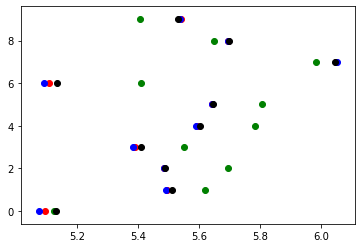

In [36]:
nums = [ix for ix in range(X_test.shape[0])]
plt.scatter(np.log10(y_pred[:10]), np.array(nums[:10]), color='r')
plt.scatter(np.log10(y_pred_sklearn[:10]), np.array(nums[:10]), color='b')
plt.scatter(np.log10(y_test[:10]), np.array(nums[:10]), color='g')
plt.scatter(np.log10(y_pred_nn[:10]), np.array(nums[:10]), color='black')


plt.show()